# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Andrew Vu
### Student ID: 015055911
### Email address: andrew.k.vu@sjsu.edu
Any special notes or anything you would like to communicate to me about this project submission goes in here.

##  <u> Project description/introduction text (the background information) </u>

The problem that I will be solving is predicting whether a patient would likely receive a stroke based on certain factors. It’s interesting to me because I’m not particularly familiar with strokes and their risks, so it would be helpful to know about. The problem is important to solve since strokes are the 2nd leading cause of death in the world. With such a popular cause of death, the problem naturally has been investigated many times. By evaluating factors like gender, age, and bmi, the goal of the project would be to predict whether a patient would potentially have a stroke or not.


##  <u> Machine learning algorithm selected for this project </u>

I used a decision tree machine learning model to complete this project. A decision tree is a hierarchical tree which can be traversed to make a decision, where each “node” of the tree is a decision that can split into different “sub-nodes.”

##  <u> Dataset source </u>

List the source from where the dataset for this project was obtained.  
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

##  <u> References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.
- DecisionTreesBreast File
- HW5
- https://www.kaggle.com/code/kirasmith509/stroke-prediction-95-accuracy
- https://www.kaggle.com/code/mohitkarelia/stroke-prevention/notebook

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [654]:
np.random.seed(42)

#### Code the solution

### 1. Load the Dataset

In [655]:
stroke_file = pd.read_csv(r'C:\Users\Andrew\CS156 Jupyter Files\finalprojectuseful\healthcare-dataset-stroke-data.csv')

In [656]:
df = pd.DataFrame(stroke_file, columns=stroke_file.columns)
df = df.drop(columns=['id'])
columns = df.columns[:-1]
X = df[columns]
Y = df['stroke']
class_names = ["No Stroke - 0", "Stroke - 1"]

print(X.shape, Y.shape)
df.head()

(5110, 10) (5110,)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2. Replacing null values

In [657]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [658]:
# replacing NaN values with the bmi mean
df['bmi'] = df['bmi'].replace(np.nan, df['bmi'].mean())

In [659]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### 3. Converting categorical variables using one-hot encoding

In [660]:
unconverted = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_numeric = pd.get_dummies(df, columns=unconverted, prefix=unconverted)

# reordering df so that stroke is at the end
stroke_col = df_numeric['stroke']
df_numeric = df_numeric.drop(columns=['stroke'])
df_numeric.insert(loc=21, column='stroke', value=stroke_col)

df_numeric.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1


In [661]:
new_columns = df_numeric.columns[:-1]
X_new = df_numeric[new_columns]
Y_new = df_numeric['stroke']

### 4. Break data into training & test datasets

In [662]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4088, 21), (4088,), (1022, 21), (1022,))

### 5. Train Decision Tree Model and Report 5-fold cross-validation accuracy & mean accuracy

In [663]:
model = DecisionTreeClassifier(random_state=0)

cross_vals = cross_val_score(model, X_train, Y_train, cv=5)
print('Individual cross-validation accuracies: ' + str(cross_vals))
print('Mean cross validation accuracy: ' + str(cross_vals.mean()))

Individual cross-validation accuracies: [0.91 0.9  0.9  0.91 0.92]
Mean cross validation accuracy: 0.9087603582789919


### 6. Train Tree on Training Data and Report Prediction Accuracy on Test Data

In [664]:
model.fit(X_train, Y_train)
print('Accuracy of decision tree model on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of decision tree model on test set: {:.2f}'.format(model.score(X_test, Y_test)))
model_score = model.score(X_test, Y_test)

Accuracy of decision tree model on training set: 1.00
Accuracy of decision tree model on test set: 0.92


### 7. Plotting decision tree and confusion matrix

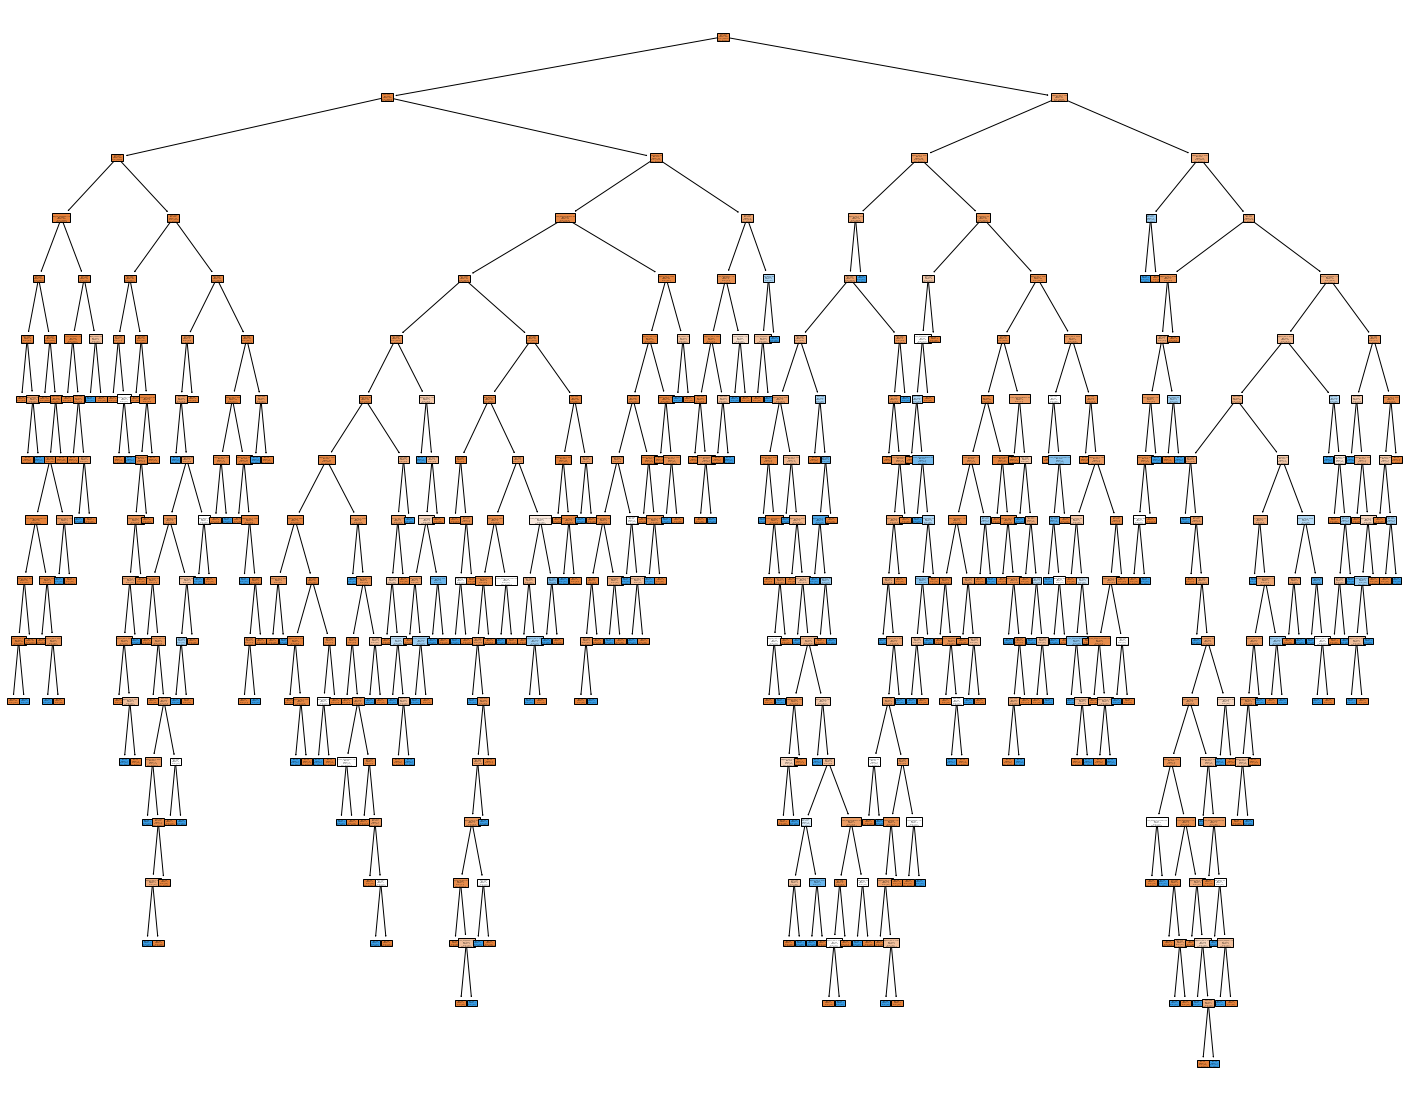

In [665]:
# Plotting tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=new_columns, class_names=class_names, filled=True)

Confusion matrix, without normalization with accuracy: 1.00
[[3889    0]
 [   0  199]]


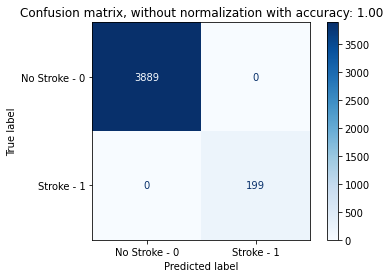

In [666]:
np.set_printoptions(precision=2)
titles_options = [(("Confusion matrix, without normalization with accuracy: {:.2f}".format(model.score(X_train, Y_train))), None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, Y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization with accuracy: 0.92
[[936  36]
 [ 44   6]]


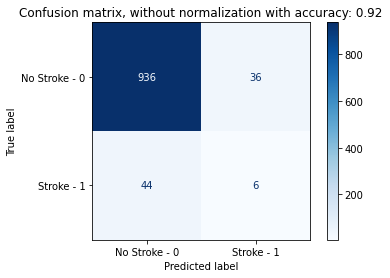

In [667]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [(("Confusion matrix, without normalization with accuracy: {:.2f}".format(model.score(X_test, Y_test))), None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()